 ###                                       <span style="color:#f6bcbc">AG News Classification Dataset</span> 

In [45]:
import pandas as pd
import numpy as np

In [46]:
data=pd.read_csv('test.csv')

In [47]:
data.head()

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


### the dataset consists of 3 clomn and  7600 row

In [48]:
data.shape

(7600, 3)

In [49]:

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import string
from nltk.stem import PorterStemmer
import numpy as np
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt



### the target is to  devided  artical to subject from  4 category: sports,business,sciente,world.
world=1,sport=2,business=3,Science=4

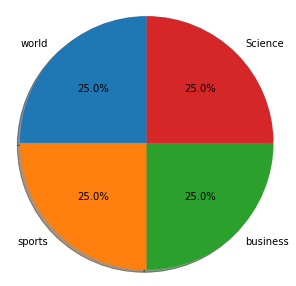

In [50]:
fig = plt.figure(figsize=(5,5))
labels = 'world', 'sports', 'business' , 'Science'
sizes = [len(data[data['Class Index']==1]), len(data[data['Class Index']==2]), len(data[data['Class Index']==3]), len(data[data['Class Index']==4])]
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  
plt.show()

In [51]:

data.dtypes

Class Index     int64
Title          object
Description    object
dtype: object

In [52]:
`\n", "# Heading 1\n", "# Heading 2\n", "## Heading 2.1\n", "## Heading 2.2\n", "`

SyntaxError: invalid syntax (<ipython-input-52-6cb26c685fee>, line 1)

In [57]:
# get the number of missing data points per column
missing_values_count = data.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

Class Index    0
Title          0
Description    0
dtype: int64

In [60]:
# how many total missing values do we have?
total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.0


### cleaning the dataset,from unnecessary signs

In [71]:
def remove_punc(text):
    text = re.sub('\[.*?\]', '', text)
   
    text = re.sub('<.*?>+', '', text)
    ###
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    ###text = re.sub('\w*\d\w*', '', text)
    return text

In [72]:
data['Description'].apply(lambda x: remove_punc(x))



0       Unions representing workers at Turner   Newall...
1       SPACEcom  TORONTO Canada  A secondteam of rock...
2       AP  A company founded by a chemistry researche...
3       AP  Its barely dawn when Mike Fitzpatrick star...
4       AP  Southern Californias smogfighting agency w...
                              ...                        
7595    Ukrainian presidential candidate Viktor Yushch...
7596    With the supply of attractive pitching options...
7597    Like Roger Clemens did almost exactly eight ye...
7598    SINGAPORE  Doctors in the United States have w...
7599    EBay plans to buy the apartment and home renta...
Name: Description, Length: 7600, dtype: object